In [79]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [80]:
train = pd.read_csv('C:\\Users\\guilh_000\Documents\\tweetsclassify\\train.csv', encoding='latin-1')

print(train.shape)

(99989, 3)


In [81]:
train['Sentiment'].value_counts()

1    56457
0    43532
Name: Sentiment, dtype: int64

In [82]:
trainone = train[train['Sentiment']==1].head(12125)
#trainone.head(10)
train = train.drop(train.index[trainone.index])
train['Sentiment'].value_counts()

1    44332
0    43532
Name: Sentiment, dtype: int64

In [83]:
from textblob import TextBlob
def lemmatize_with_postag(sentence):
    sent = TextBlob(sentence)
    tag_dict = {"J":'a',"N":'n',"V":'v',"R":'r'}
    words_and_tags = [(w, tag_dict.get(pos[0],'n'))for w, pos in sent.tags]
    lemmatized_list = [wd.lemmatize(tag)for wd, tag in words_and_tags]
    return " ".join(lemmatized_list)

import string
import nltk
from nltk.corpus import stopwords
import re
def normalizer(tweet):
    punct = list(string.punctuation)
    stop_words = stopwords.words('english')
    additional_stop_words = ['RT','rt','via','...','http','twitpic','tinyurl','www', 'amp']
    stopword_list = punct + stop_words + additional_stop_words
    
    tweet = re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)", " ", tweet)
    tweet_ = re.sub("(\w+:\/\/\S+)", " ", tweet)
    tweet__ = re.sub("[^a-zA-Z]", " ", tweet_)
    lemmatized = lemmatize_with_postag(tweet__)
    tokens = nltk.word_tokenize(lemmatized)[2:]
    lower_case = [l.lower() for l in tokens]
    filtered_result = list(filter(lambda l: l not in stopword_list, lower_case))
    return filtered_result

In [84]:
train['normalized'] = train.SentimentText.apply(normalizer)
train['normal'] = [' '.join(map(str, l)) for l in train['normalized']]

In [85]:
train['normal'].replace('', np.nan, inplace=True)
train.dropna(subset=['normal'], inplace=True)
#train.tail(20)

In [86]:
train['Sentiment'].value_counts()

0    41414
1    40860
Name: Sentiment, dtype: int64

In [91]:
from scipy.sparse import hstack
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer  

count_vectorizer = CountVectorizer(ngram_range=(1,2))
vectorized_data =count_vectorizer.fit_transform(train['normal'])

#tfidfconverter = TfidfTransformer()  
#tfid_data = tfidfconverter.fit_transform(vectorized_data)

#indexed_data =hstack((np.array(range(0,tfid_data.shape[0]))[:,None],tfid_data))

indexed_data =hstack((np.array(range(0,vectorized_data.shape[0]))[:,None],vectorized_data))

In [92]:
targets = train.iloc[:, 1]

from sklearn.model_selection import train_test_split 
data_train, data_test, targets_train, targets_test =train_test_split(indexed_data, targets, test_size=0.3,random_state=0)
data_train_index = data_train[:,0]
data_train = data_train[:,1:]
data_test_index = data_test[:,0]
data_test = data_test[:,1:]

In [97]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 10):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(data_train, targets_train)
    pred_i = knn.predict(data_test)
    error.append(np.mean(pred_i != targets_test))

Text(0,0.5,'Mean Error')

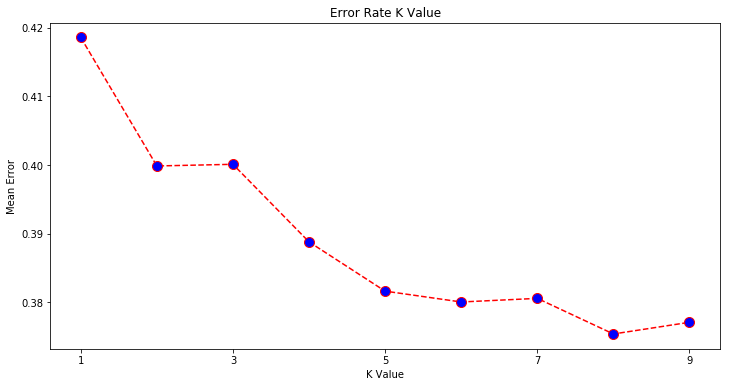

In [98]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.xticks(np.arange(1,10,2), np.arange(1,10,2))
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')

In [99]:
from sklearn.neighbors import KNeighborsClassifier  
kn = KNeighborsClassifier(n_neighbors=9)  
kn.fit(data_train, targets_train)

KNeighborsClassifier(n_neighbors=9)

In [100]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, classification_report

ky_pred = kn.predict(data_test)

print(confusion_matrix(targets_test, ky_pred))
print(classification_report(targets_test, ky_pred))
print(accuracy_score(targets_test, ky_pred))

[[6236 6184]
 [3124 9139]]
              precision    recall  f1-score   support

           0       0.67      0.50      0.57     12420
           1       0.60      0.75      0.66     12263

    accuracy                           0.62     24683
   macro avg       0.63      0.62      0.62     24683
weighted avg       0.63      0.62      0.62     24683

0.6228983510918445


In [101]:
###########################################################################################################
from sklearn import svm
clf = svm.SVC(C= 1, kernel='linear')
clf.fit(data_train, targets_train)

SVC(C=1, kernel='linear')

In [102]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, classification_report

targets_pred = clf.predict(data_test)

print(confusion_matrix(targets_test, targets_pred))
print(classification_report(targets_test,targets_pred))
print(accuracy_score(targets_test, targets_pred))


[[8086 4334]
 [3293 8970]]
              precision    recall  f1-score   support

           0       0.71      0.65      0.68     12420
           1       0.67      0.73      0.70     12263

    accuracy                           0.69     24683
   macro avg       0.69      0.69      0.69     24683
weighted avg       0.69      0.69      0.69     24683

0.691001904144553


In [124]:
#############################################################################################################
from sklearn.naive_bayes import MultinomialNB
nbc = MultinomialNB(fit_prior=True, alpha=1.0).fit(data_train, targets_train)

In [125]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, classification_report

nb_pred = nbc.predict(data_test)

print(confusion_matrix(targets_test, nb_pred))
print(classification_report(targets_test,nb_pred))
print(accuracy_score(targets_test, nb_pred))

[[8903 3517]
 [3991 8272]]
              precision    recall  f1-score   support

           0       0.69      0.72      0.70     12420
           1       0.70      0.67      0.69     12263

    accuracy                           0.70     24683
   macro avg       0.70      0.70      0.70     24683
weighted avg       0.70      0.70      0.70     24683

0.6958230360977191


In [127]:
#CHECK BEST PARAMETERS ONLY RUN IF FAST GPU

from sklearn.model_selection import GridSearchCV
hiperparameters = {'alpha': (1.0,1.5,2.0,2.5,3.0),'fit_prior':[True, False]}
grid = GridSearchCV(MultinomialNB(), hiperparameters, cv=3)
grid.fit(data_train, targets_train)

print(grid.best_params_)
print(grid.best_score_)

{'alpha': 3.0, 'fit_prior': False}
0.6951607021930509


In [128]:
#############################################################################################################
from sklearn.naive_bayes import MultinomialNB
nbm = MultinomialNB(fit_prior=False, alpha=3.0).fit(data_train, targets_train)

In [129]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, classification_report

nbm_pred = nbm.predict(data_test)

print(confusion_matrix(targets_test, nbm_pred))
print(classification_report(targets_test,nbm_pred))
print(accuracy_score(targets_test, nbm_pred))

[[9446 2974]
 [4401 7862]]
              precision    recall  f1-score   support

           0       0.68      0.76      0.72     12420
           1       0.73      0.64      0.68     12263

    accuracy                           0.70     24683
   macro avg       0.70      0.70      0.70     24683
weighted avg       0.70      0.70      0.70     24683

0.7012113600453753


In [184]:
tweet_test = ['Today was a good day']
x = count_vectorizer.transform(tweet_test)
if(nbm.predict(x)==1):
    print('Positive')
else:
    print('Negative')

Positive


In [180]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, classification_report

nbmt_pred = nbm.predict(data_train)

print(confusion_matrix(targets_train, nbmt_pred))
print(classification_report(targets_train,nbmt_pred))
print(accuracy_score(targets_train, nbmt_pred))

[[26738  2256]
 [ 4113 24484]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.89     28994
           1       0.92      0.86      0.88     28597

    accuracy                           0.89     57591
   macro avg       0.89      0.89      0.89     57591
weighted avg       0.89      0.89      0.89     57591

0.8894098036151482


0    28994
1    28597
Name: Sentiment, dtype: int64 [28994 28994]
